In [2]:
import numpy as np # for analysing and processing data
import matplotlib.pyplot as plt # for visualizing the data
from astropy.io import fits # This will be for opening/reading up the astronomical data 
import aplpy # visulazing the data in a more better way!
import pandas as pd # for data handling

ModuleNotFoundError: No module named 'aplpy'

In [3]:
astro_data = fits.open("HorseHead.fits") #loading the data

In [4]:
astro_data # taking a look what type of object the data actually is

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000017E55BA6B90>, <astropy.io.fits.hdu.table.TableHDU object at 0x0000017E56F68E90>]

In [5]:
astro_data.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [6]:
# displaying the header of the data which contains all the information about the telescope, dimension of the image, observation location, etc..

astro_data[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [7]:
image_data = astro_data[0].data # the actual image data
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype='>i2')

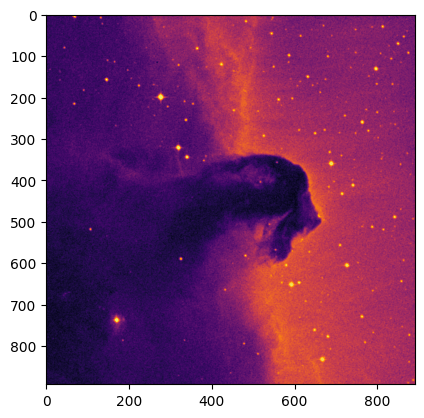

In [8]:
plt.imshow(image_data,cmap="inferno") # displaying the image

In [9]:
# some basic statistics with the image data...

print("Mean :", np.mean(image_data))
print("Median :", np.median(image_data))
print("Max :", np.max(image_data))
print("Min :", np.min(image_data))
print("std :", np.std(image_data))

Mean : 9831.481676287574
Median : 9658.0
Max : 22918
Min : 3759
std : 3032.3927542049046


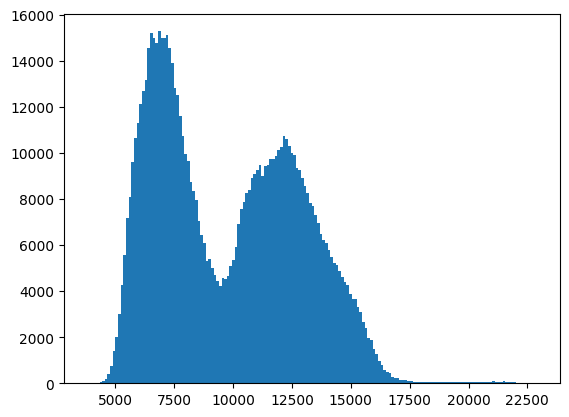

In [10]:
#loading the histogram of the image..

plt.hist(image_data.flatten(),bins="auto")
plt.show()

In [11]:
# using the aplpy library which is often used by astronomers...

gc = aplpy.FITSFigure('2MASS_k.fits') # loading the image as an aplpy object
gc.show_grayscale() #displaying the image..

NameError: name 'aplpy' is not defined

INFO: Auto-setting vmin to  3.604e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.736e+03 [aplpy.core]


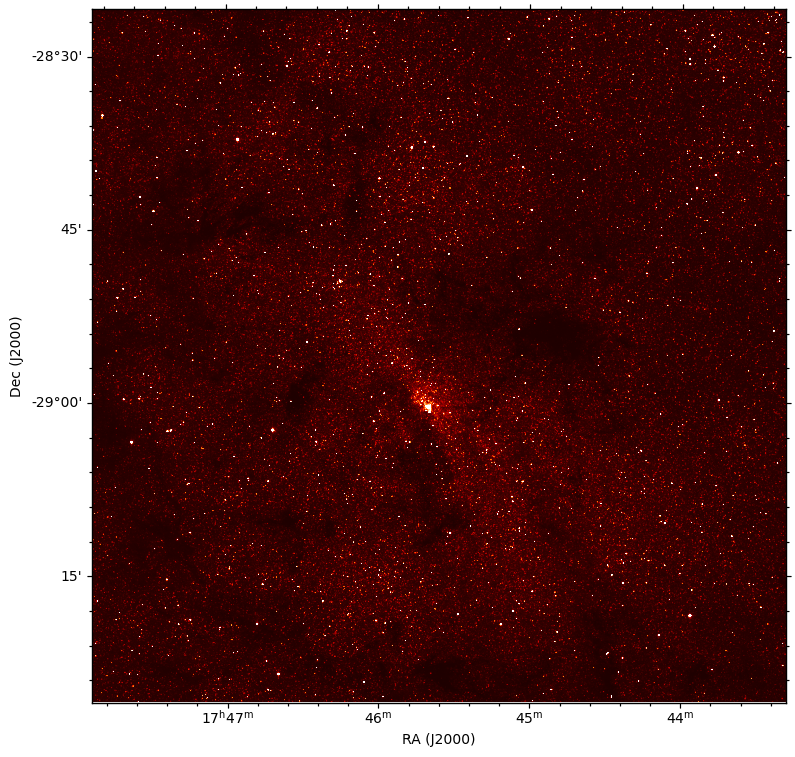

In [16]:
# displaying the image using a different color scale

gc = aplpy.FITSFigure('2MASS_k.fits') # loading the image as an aplpy object
gc.show_colorscale(cmap='gist_heat') #displaying the image..

INFO: Auto-setting vmin to  3.481e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.897e+03 [aplpy.core]


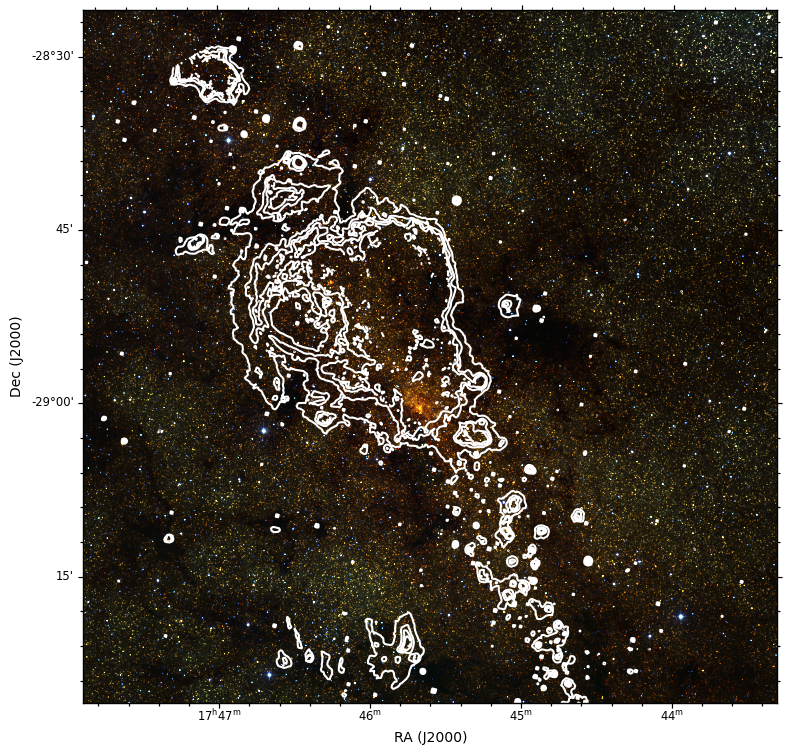

In [20]:
# if you happen to hacve rgb data you can also use that..

# displaying the image using a different color scale

# here we will also overlay some more data, like lets say highlighting a certain part of the image using some contours...

gc = aplpy.FITSFigure('2MASS_k.fits') # loading the image as an aplpy object
gc.show_colorscale(cmap='gist_heat') #displaying the image..
gc.show_rgb('2MASS_arcsinh_color.png')
gc.tick_labels.set_font(size='small')
gc.show_contour('mips_24micron.fits', colors='white')

INFO: Auto-setting vmin to  3.326e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.063e+03 [aplpy.core]


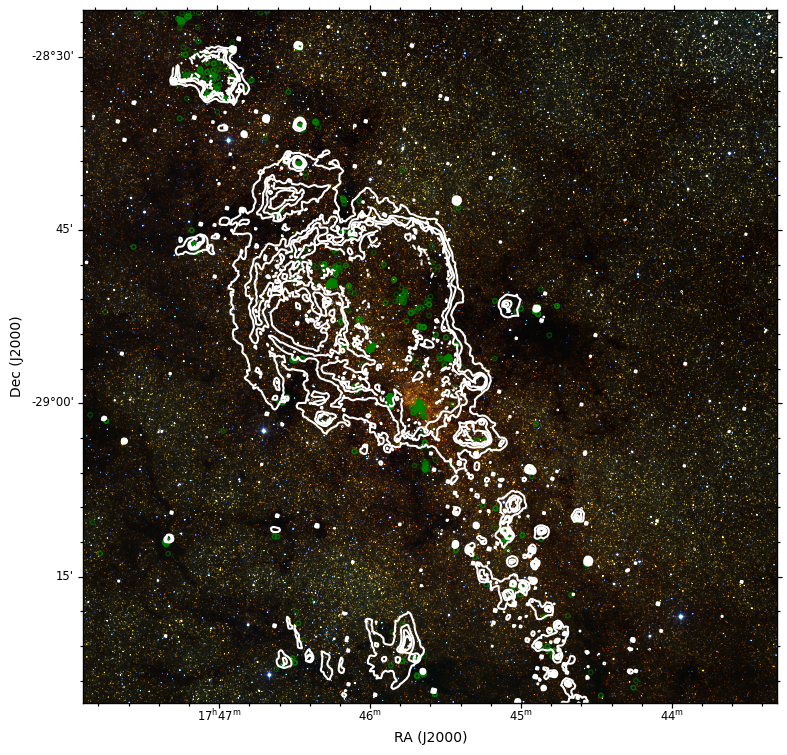

In [24]:
# now lets load in some more data ...


gc = aplpy.FITSFigure('2MASS_k.fits') # loading the image as an aplpy object
gc.show_colorscale(cmap='gist_heat') #displaying the image..
gc.show_rgb('2MASS_arcsinh_color.png')
gc.tick_labels.set_font(size='small')
gc.show_contour('mips_24micron.fits', colors='white')

# loading the ra and dec as show in the video...


ra, dec = np.loadtxt('yso_wcs_only.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='green', facecolor='none',
                marker='o', s=10, alpha=0.5)